In [1]:
import pandas as pd
import numpy as np
import altair as alt


df = pd.read_csv("clinical_trial.csv")

df

,group,covid
0,treatment,False
1,control,False
2,treatment,False
3,control,False
4,treatment,False
...,...,...
29995,control,False
29996,control,False
29997,treatment,False
29998,treatment,False


In [2]:
df.head()

,group,covid
0,treatment,False
1,control,False
2,treatment,False
3,control,False
4,treatment,False


In [3]:
df_pivot = pd.pivot_table(
    data = df,
    index = "group",
    values = "covid"
    
)

df_pivot

,covid
group,
control,0.150783
treatment,0.015682


In [4]:
data2 = df_pivot

vaccine_effect = (1 - (data2['covid'][1]/data2['covid'][0])) * 100
fewer = data2['covid'][1] - data2['covid'][0]



print("The vaccine is about", round(vaccine_effect), "percent effective.")

print("The vaccinated group has", (fewer), "percent fewer cases of covid")

The vaccine is about 90 percent effective.
The vaccinated group has -0.13510020176686843 percent fewer cases of covid


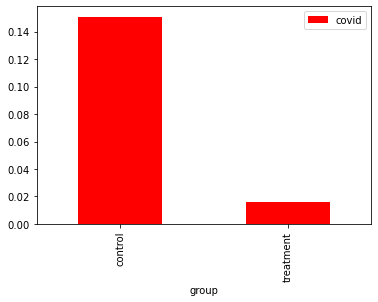

In [5]:
s = data2

p = s.plot(kind = 'bar', color = 'r')

In [6]:
df3 = pd.DataFrame(df.value_counts())

df3


0
group     covid       
treatment False  14750
control   False  12751
          True    2264
treatment True     235

In [7]:
df = df3.reset_index()

df.columns = ['group', 'covid', 'df3']

df

,group,covid,df3
0,treatment,False,14750
1,control,False,12751
2,control,True,2264
3,treatment,True,235


In [8]:
did_not = df['df3'][0] + df['df3'][1]

did = df['df3'][2] + df['df3'][3]

print(did, " paitents did have covid.")
print(did_not, "paitents did not have covid.")

2499  paitents did have covid.
27501 paitents did not have covid.


In [9]:
booleanIndex = (df['group'] == 'treatment')

df2 = df[booleanIndex]

df2

,group,covid,df3
0,treatment,False,14750
3,treatment,True,235


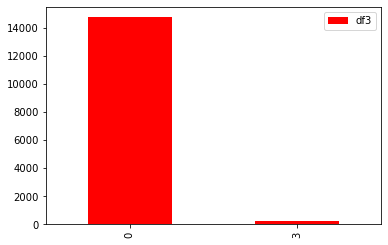

In [10]:
s = df2

p = s.plot(kind = 'bar', color = 'r')

In [11]:
booleanIndex = (df['group'] == 'control')

df4 = df[booleanIndex]

df4

,group,covid,df3
1,control,False,12751
2,control,True,2264


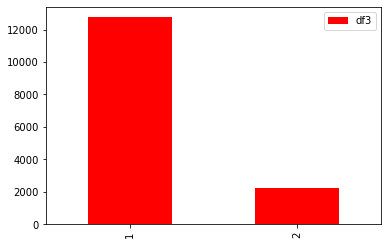

In [12]:
s = df4

p = s.plot(kind = 'bar', color = 'r')